# Exploratory Data Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
from sklearn import ensemble, tree, linear_model
import missingno as msno
import warnings
warnings.filterwarnings("ignore")
train = pd.read_csv('/Users/lululiya/Desktop/train.csv')
test = pd.read_csv('/Users/lululiya/Desktop/test.csv')

## Estimate Skewness and Kurtosis峰态<br>

In [2]:
numeric_features = train.select_dtypes(include=[np.number])

train_nu = numeric_features
train_nu.skew(), train_nu.kurt()
#function .skew() and .kurt() only work for numeric data
#from package scipy

(Id                0.000000
 MSSubClass        1.407657
 LotFrontage       2.163569
 LotArea          12.207688
 OverallQual       0.216944
 OverallCond       0.693067
 YearBuilt        -0.613461
 YearRemodAdd     -0.503562
 MasVnrArea        2.669084
 BsmtFinSF1        1.685503
 BsmtFinSF2        4.255261
 BsmtUnfSF         0.920268
 TotalBsmtSF       1.524255
 1stFlrSF          1.376757
 2ndFlrSF          0.813030
 LowQualFinSF      9.011341
 GrLivArea         1.366560
 BsmtFullBath      0.596067
 BsmtHalfBath      4.103403
 FullBath          0.036562
 HalfBath          0.675897
 BedroomAbvGr      0.211790
 KitchenAbvGr      4.488397
 TotRmsAbvGrd      0.676341
 Fireplaces        0.649565
 GarageYrBlt      -0.649415
 GarageCars       -0.342549
 GarageArea        0.179981
 WoodDeckSF        1.541376
 OpenPorchSF       2.364342
 EnclosedPorch     3.089872
 3SsnPorch        10.304342
 ScreenPorch       4.122214
 PoolArea         14.828374
 MiscVal          24.476794
 MoSold            0

###### **skewness**
<br> is a statistical terms and it is a way to estimate or measure the shape of a distribution. It is an important statistical methodology that is used to estimate the asymmetrical behaviour rather than computing frequency distribution. Skewness ca be two ways:<br>
- **Symmetrical**: a distribution can be called symmetric if it appears the same form the left and right from thr center point.<br>
- **Asymmetrical**: a distribution can be called asymmetric if it doesn't appear the same from the left and right from the center point.<br>

**Distribution on the basis of skewness value**:<br>
- skewness =0: normally distributed<br>
- skewness >0: more weight in the left tail of the distribution.<br>
- skewness <0: more weight in the right tail of the distribution.<br>

###### **Kurtosis**
It is also a statistical term and an important characteristic pf frequency distribution. It determines whether a distribution is **heavy-tailed** in respect of the normal disribution. It provides information about the **shape** of a frequency distribution.<br>
- kurtosis for normal distribution is equal to3.<br>
- for a distribution having kurtosis <3: It is called playkurtic.<br>
- for a distribution having kurtosis >3, it is leptokurtic and it signifies that it tries to produce more outliers rather than the normal distribution.<br>

https://www.geeksforgeeks.org/how-to-calculate-skewness-and-kurtosis-in-python/<br>

Then we can take a look at the distribution of _SalePrice_<br>
[seaborn library] https://seaborn.pydata.org/<br>
[ploting] https://seaborn.pydata.org/tutorial/function_overview.html<br>
`sns.displot()` https://seaborn.pydata.org/generated/seaborn.displot.html#seaborn.displot<br>
`plt.ticklabel_format(style='plain', axis='y')` helps get rid of scienctific notation on y-axis

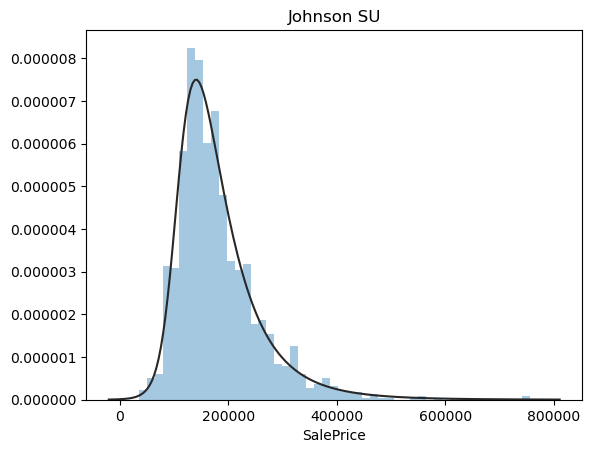

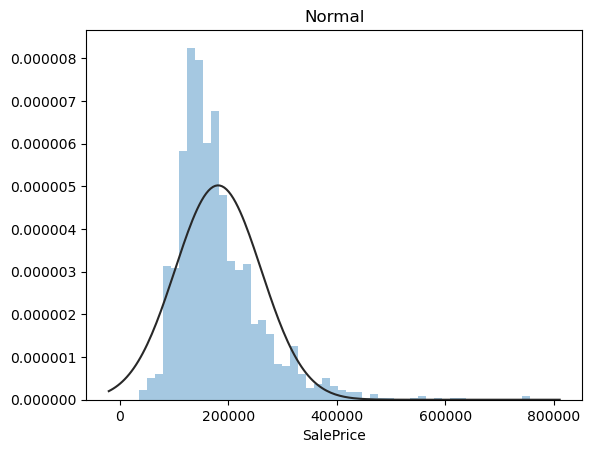

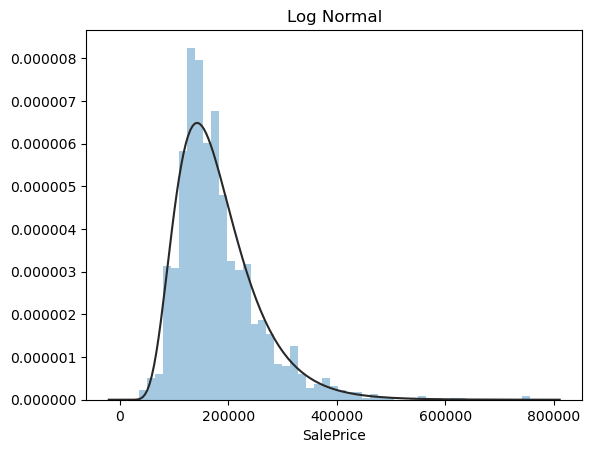

In [3]:
y = train['SalePrice']
plt.figure(1); plt.title('Johnson SU')
sns.distplot(y, kde=False, fit=st.johnsonsu)
plt.ticklabel_format(style='plain', axis='y')
plt.figure(2); plt.title('Normal')
sns.distplot(y, kde=False, fit=st.norm)
plt.ticklabel_format(style='plain', axis='y')
plt.figure(3); plt.title('Log Normal')
sns.distplot(y, kde=False, fit=st.lognorm)
plt.ticklabel_format(style='plain', axis='y')

it is apparent that _SalePrice_ doesn't follow normal dis, so before performing regressionit has to be **transformed**. While log transformationdoes pretty goo job, best fit it unbounded Johnson dis.

<Axes: xlabel='Skewness', ylabel='Density'>

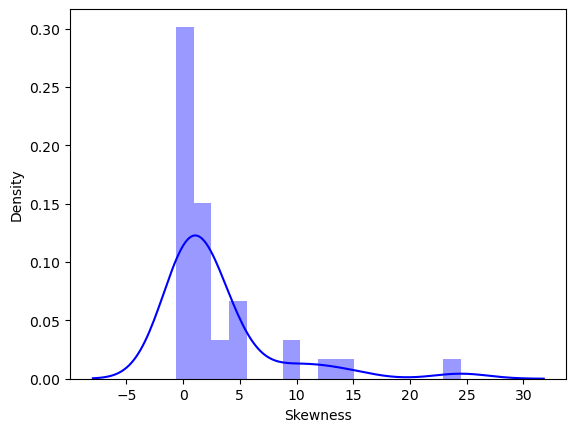

In [4]:
sns.distplot(train_nu.skew(),color='blue',axlabel='Skewness')

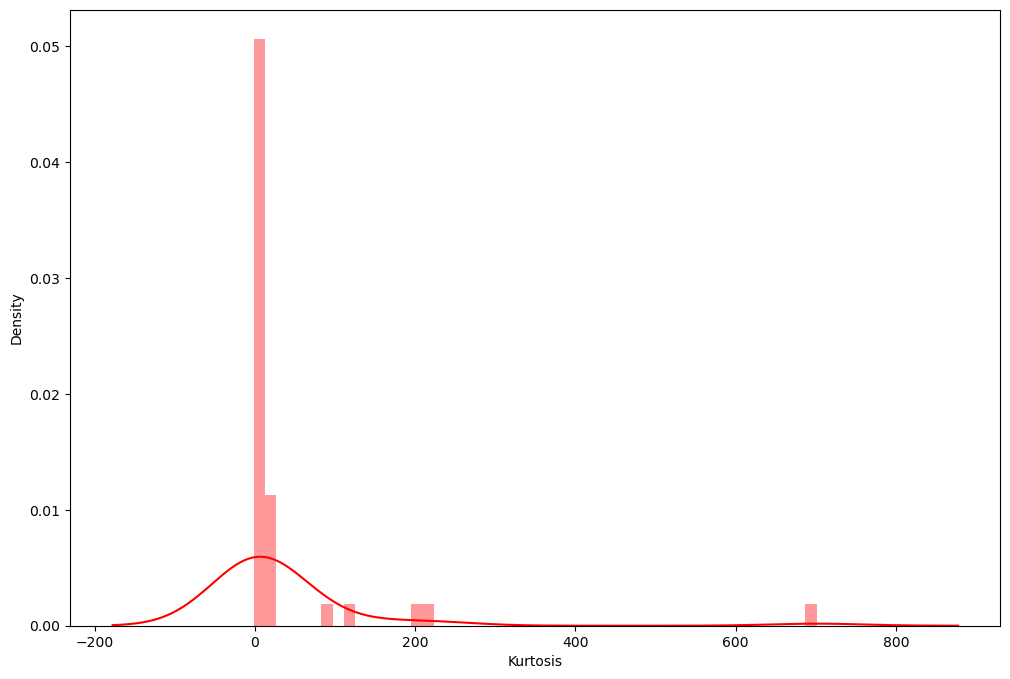

In [5]:
plt.figure(figsize = (12,8))
sns.distplot(train_nu.kurt(),color='r',axlabel ='Kurtosis',norm_hist= False, kde = True,rug = False)
plt.show()

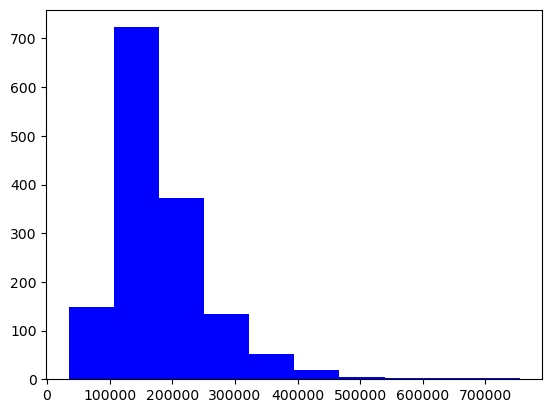

In [6]:
plt.hist(y,orientation = 'vertical',histtype = 'bar', color ='blue')
plt.show()

(array([  5.,  12.,  54., 184., 470., 400., 220.,  90.,  19.,   6.]),
 array([10.46024211, 10.7676652 , 11.07508829, 11.38251138, 11.68993448,
        11.99735757, 12.30478066, 12.61220375, 12.91962684, 13.22704994,
        13.53447303]),
 <BarContainer object of 10 artists>)

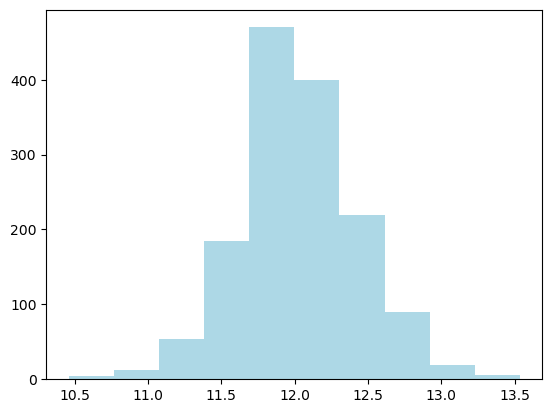

In [7]:
target = np.log(y)#transformation
target.skew()
plt.hist(target,color='lightblue')

now we can find the correlation coefficients between numeric features and _SalePrice_

In [8]:
correlation = numeric_features.corr()
print(correlation['SalePrice'].sort_values(ascending = False),'\n')

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePr

## to explore further we will start with the following visualisation methods to analyse the data better<br>
- correlation heat map<br>
- zoomed heat map<br>
- pair plot<br>
- scatter plot<br>
### Correlation Heat Map<br>
heatmap annotation https://seaborn.pydata.org/examples/spreadsheet_heatmap.html<br>
https://seaborn.pydata.org/generated/seaborn.heatmap.html#seaborn.heatmap

<Axes: title={'center': 'Correlation of Numeric Features with SalePrice'}>

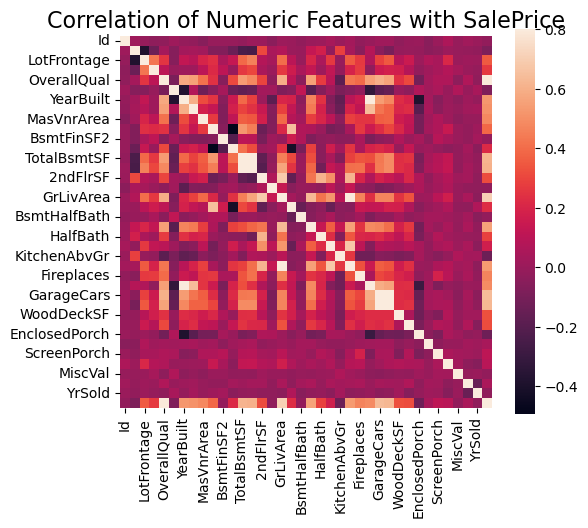

In [15]:
f, ax = plt.subplots(figsize=(6,5))
#set canvas: f is the entrie plot (canvas) 
#and ax is the heatmap here 
plt.title('Correlation of Numeric Features with SalePrice',y=1,size=16)
sns.heatmap(correlation,square=True,vmax=0.8)
#vmax is the max of the legend, smaller-->vague positive correlated

f: This variable holds the Figure object. The Figure is the top-level container for all the plot elements. It represents the entire figure or window in which the plot resides.

ax: This variable holds an array of Axes objects (or a single Axes object, depending on the number of subplots). The Axes object is the area on which the data is plotted. If you have a single subplot, ax is a single Axes object; if you have multiple subplots, it's an array of Axes objects.

By using multiple assignment, you can easily unpack the two objects returned by `plt.subplots()` into the variables f and ax. This makes it convenient to reference and manipulate both the entire figure (f) and the individual subplot(s) (ax) later in your code.

The heatmap os the **best way** to get a quick overview of correlated features.<br>
At initial glance ot is observed that there are 2 red colored squares that get attention:<br> **i.e. white square** -> highly positive correlated
1. the first one refers to the 'TotalBsmtSF' and '1stFlrSF' variables<br>
2. the second one refers to the 'GarageX' variables. <br>
both cases show how significant the correlation is between these variables. Actually this correlation is so strong that is can indicate a situation of multicollinearity. If we think about these variables, we can conclude that they give almost the same nformation so multicolinearity多重共线性 really occurs.<br>

Heatmaps are great to detect this kind of multicolinearity situations and in problems related to feature selection like this project, it comes as an excellent exploratory tool.<br>
Another aspect I observed here is: the 'SalePrice' correlations. As it is observed that 'GrLivArea', 'TotalBsmtSF', and 'OverallQual' saying a big 'hello' to 'SalePrice', however we cannot exclude the fact that **rest of the features** have some level of correlation to 'SalePrice'. To observe this correlation closer let us see it in _Zoomed heat Map_.<br>
### Zoomed Heat Map<br>
SalePrice correlation matrix

In [10]:
k=11
cols=correlation.nlargest(k,'SalePrice')['SalePrice'].index
#return the first 11 variables positively correlated with saleprice in descending order with the correlation coefficient
print(cols)

Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
       'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt',
       'YearRemodAdd'],
      dtype='object')


df.nlargest() https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.nlargest.html

In [11]:
cm=np.corrcoef(train_nu[cols].values.T)
#selecting the subset(a list of column names) from train_nu
#train_nu[cols].values grab only the values in dataframe and convert them into a =n np array
#train_nu[cols].values.T transpose the matrix

<Axes: >

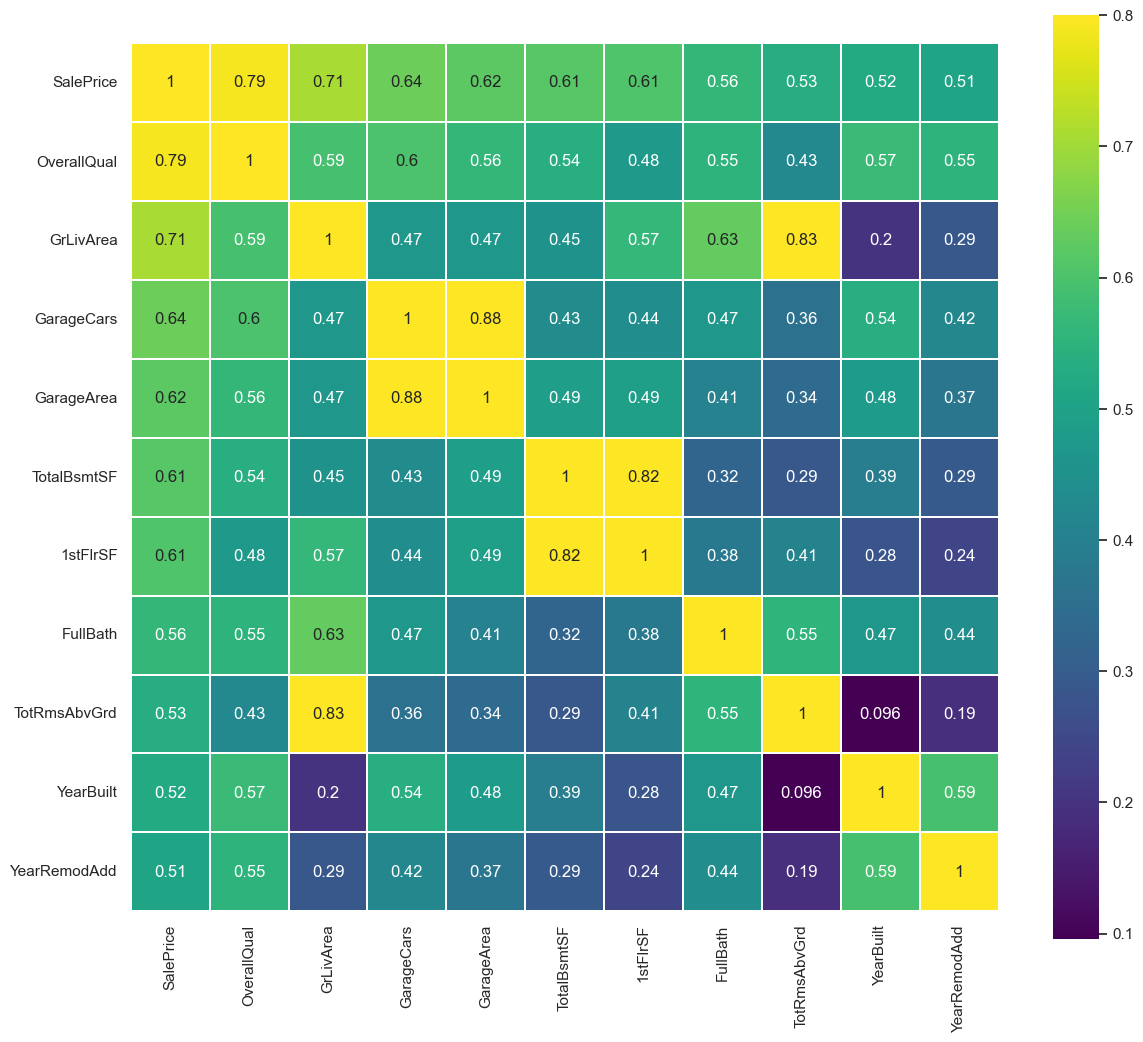

In [48]:
f, ax = plt.subplots(figsize=(14,12))
sns.heatmap(cm,vmax=0.8,linewidths=0.01,
            square=True,annot=True,cmap='viridis',linecolor='white',
           xticklabels=cols.values, 
          annot_kws={'size':12},
           yticklabels=cols.values)
#cm: correlation matirx. it should be symmetric, the diagonal elements should be 1
#vmax=0.8: max value for the color scale is 0.8
#linewidth=0.01:width of lines separating cells
#square=True: square-shaped plot
#annot=True:displays the actual value in each cell
#cmap='viridis':set the color in the plot. here we use 'viridis' color packages
#linecolor:set the color of lines separating cells
#xticklabels,yticklabels: set labels on axes
#annot_kws: specify annotation(numeric values in cells) features. here we set the size of annotations(font) is 12


from above zoomed heatmap it is observd that GaragecARS & garageArea are closely correlated. Similarly TotalBsmtSF and 1stFlrSF are also closely correlated. (find the square)<br>

My observation:<br>
- 'OverallQual', 'GrLivArea' and 'TotalBsmtSF' are strongly correlated with 'SalePrice'.<br>
- 'GarageCars' and 'GarageArea' are strongly correlated variables. It is because the number of cars that fit into the garage is a consequence of the garage area. 'GarageCars' and 'GarageArea' are like twin brothers. So it is hard to distinguish between the two. Therefore, we just need one of these variables in our analysis (we can keep 'GarageCars' since its correlation with 'SalePrice' is higher). <br>
- 'TotalBsmtSF' and '1stFloor' also seem to be twins. In this case let us keep 'TotalBsmtSF'<br>
- TotRmsAbvGrd' and 'GrLivArea', twins<br>
- 'YearBuilt' it appears like is slightly correlated with 'SalePrice'. This required more analysis to arrive at a conclusion may be do some time series analysis.<br>
[heatmap interpretation] https://www.youtube.com/watch?v=oMtDyOn2TCc

### Pair Plot<br>
#### Pair Plot between 'SalePrice' and correlated variables<br>
Visualisation of 'OverallQual','TotalBsmtSF','GrLivArea','GarageArea','FullBath','YearBuilt','YearRemodAdd' features with respect to SalePrice in the form of pair plot & scatter pair plot for better understanding.

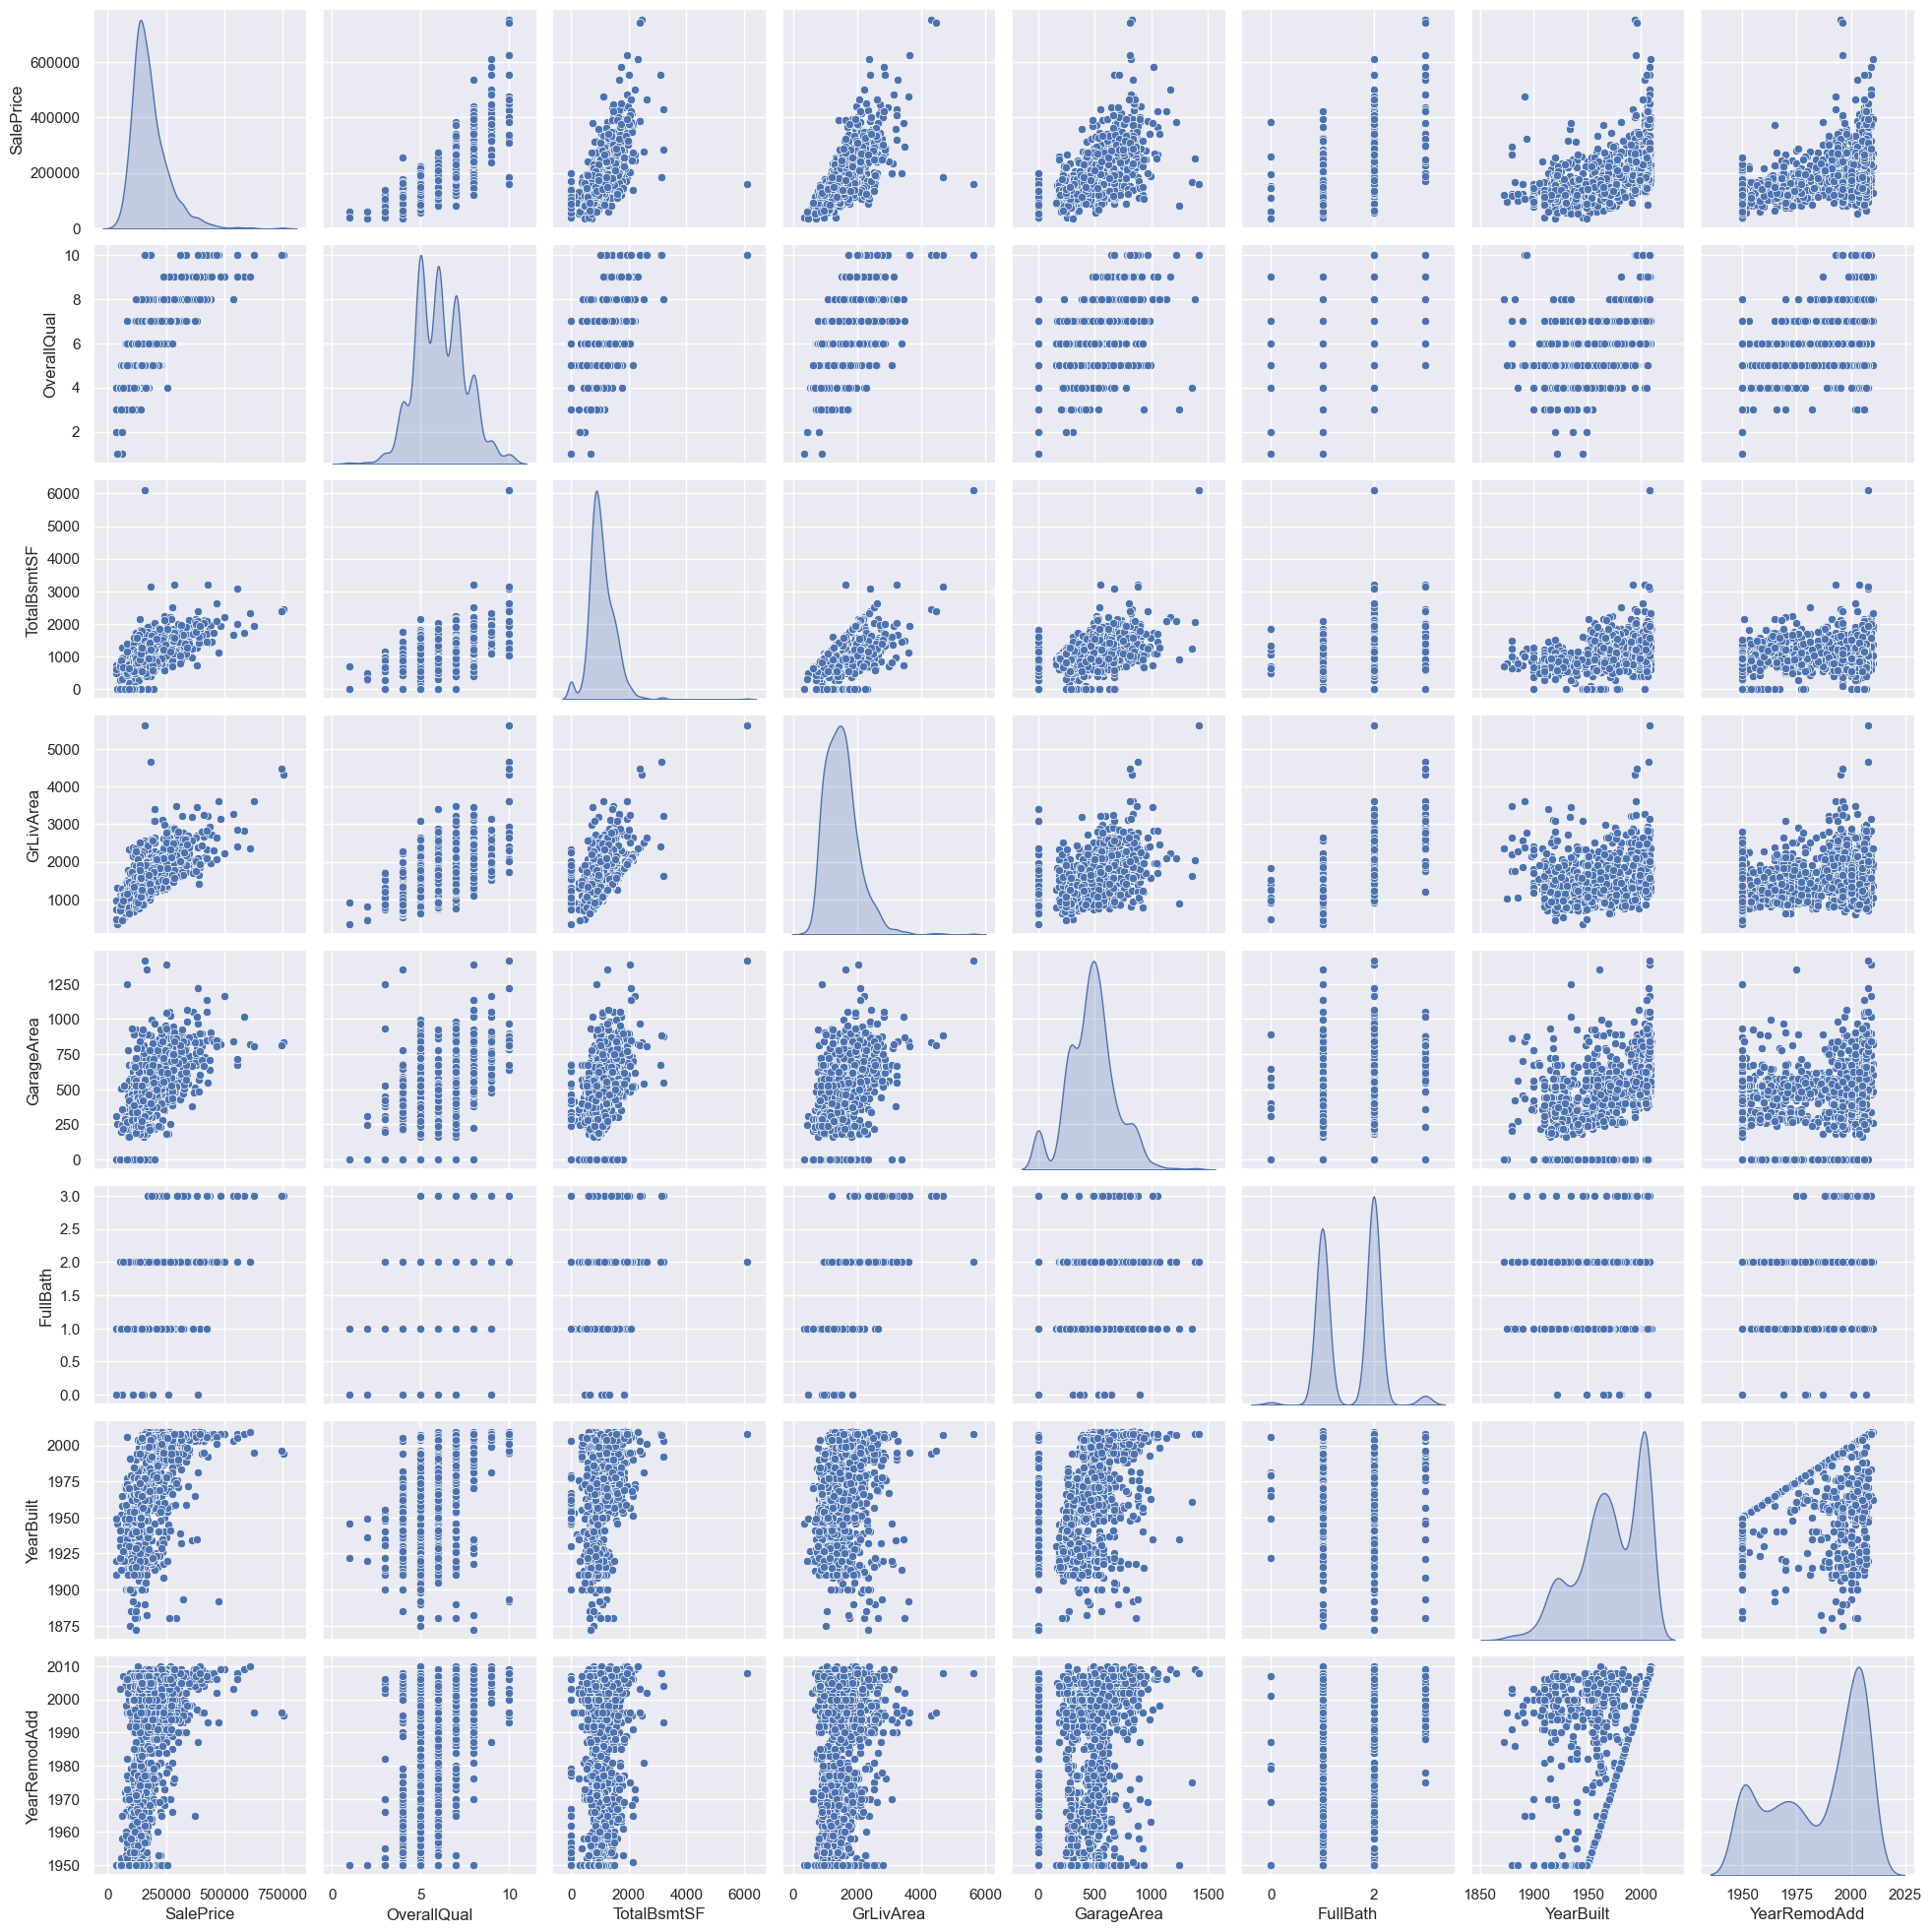

In [22]:
sns.set()
columns = ['SalePrice','OverallQual','TotalBsmtSF','GrLivArea','GarageArea','FullBath','YearBuilt','YearRemodAdd']
sns.pairplot(train_nu[columns],kind ='scatter',diag_kind='kde')
plt.show()

although we already know some of the main figures, this pair plot gives us a reasonabe overview insight about the correlated features. Here are some of the analysis:<br>
- one interesting observation is between 'TotalBsmtSF' and 'GrLiveArea'. in figure (3,4) we can see dots drawing a linear line which almost acts like a broder. it totally mkaes sense that the majority of the dots stay below that line. basement areas can be equal to the above ground living area, but it is not expected a basement area bigger than the above ground living area.<br>
- one more interesting observation is between 'SalePrice' and 'YearBuilt'. inthe bottom of the 'dots cloud' (1,7), we see what almost appears to be a exponential function. we can also see this same tendency in the upper limit of the 'dots cloud'.<br>
- last observation is that prices are increasing faster now with respect to previous years.
### Scatter Plot<br>
scatter plots between the most correlated variables.

<Axes: xlabel='YearRemodAdd', ylabel='SalePrice'>

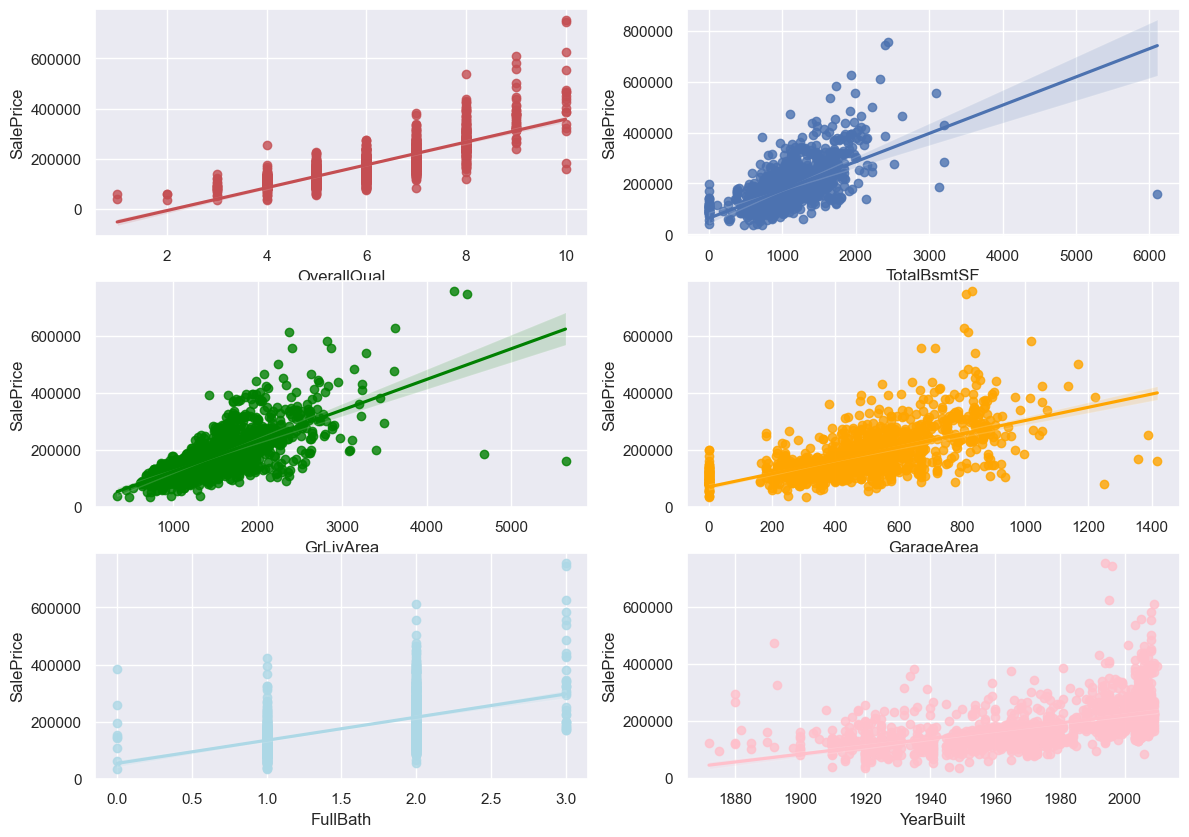

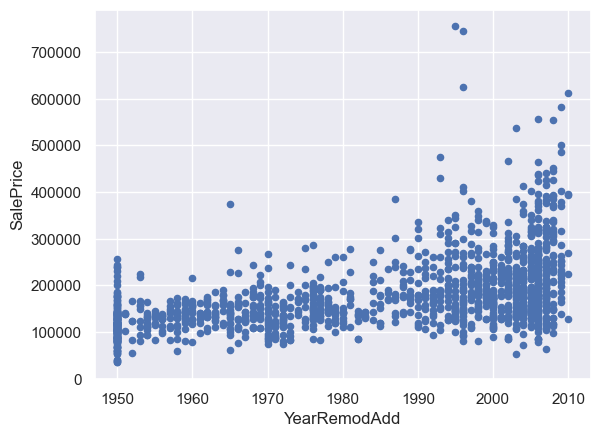

In [30]:
fig, ((ax1, ax2), (ax3, ax4),(ax5,ax6)) = plt.subplots(nrows=3, ncols=2, figsize=(14,10))

OverallQual_scatter_plot = pd.concat([train_nu['SalePrice'],train_nu['OverallQual']],axis = 1)
sns.regplot(x='OverallQual',y = 'SalePrice',data = OverallQual_scatter_plot,scatter= True, fit_reg=True, ax=ax1,color='r')

TotalBsmtSF_scatter_plot = pd.concat([train_nu['SalePrice'],train_nu['TotalBsmtSF']],axis = 1)
sns.regplot(x='TotalBsmtSF',y = 'SalePrice',data = TotalBsmtSF_scatter_plot,scatter= True, fit_reg=True, ax=ax2)

GrLivArea_scatter_plot = pd.concat([train_nu['SalePrice'],train_nu['GrLivArea']],axis = 1)
sns.regplot(x='GrLivArea',y = 'SalePrice',data = GrLivArea_scatter_plot,scatter= True, fit_reg=True, ax=ax3,color='green')

GarageArea_scatter_plot = pd.concat([train_nu['SalePrice'],train_nu['GarageArea']],axis = 1)
sns.regplot(x='GarageArea',y = 'SalePrice',data = GarageArea_scatter_plot,scatter= True, fit_reg=True, ax=ax4,color='orange')

FullBath_scatter_plot = pd.concat([train_nu['SalePrice'],train_nu['FullBath']],axis = 1)
sns.regplot(x='FullBath',y = 'SalePrice',data = FullBath_scatter_plot,scatter= True, fit_reg=True, ax=ax5,color='lightblue')

YearBuilt_scatter_plot = pd.concat([train_nu['SalePrice'],train_nu['YearBuilt']],axis = 1)
sns.regplot(x='YearBuilt',y = 'SalePrice',data = YearBuilt_scatter_plot,scatter= True, fit_reg=True, ax=ax6,color='pink')

YearRemodAdd_scatter_plot = pd.concat([train_nu['SalePrice'],train_nu['YearRemodAdd']],axis = 1)

YearRemodAdd_scatter_plot.plot.scatter('YearRemodAdd','SalePrice')

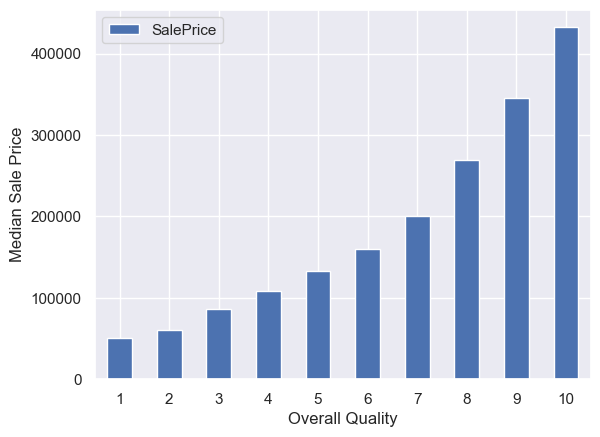

In [56]:
saleprice_overall_quality= train.pivot_table(index ='OverallQual',values = 'SalePrice', aggfunc = np.median)
saleprice_overall_quality.plot(kind = 'bar',rot=0)
plt.xlabel('Overall Quality')
plt.ylabel('Median Sale Price')
plt.show()

### Box plot - OverallQual

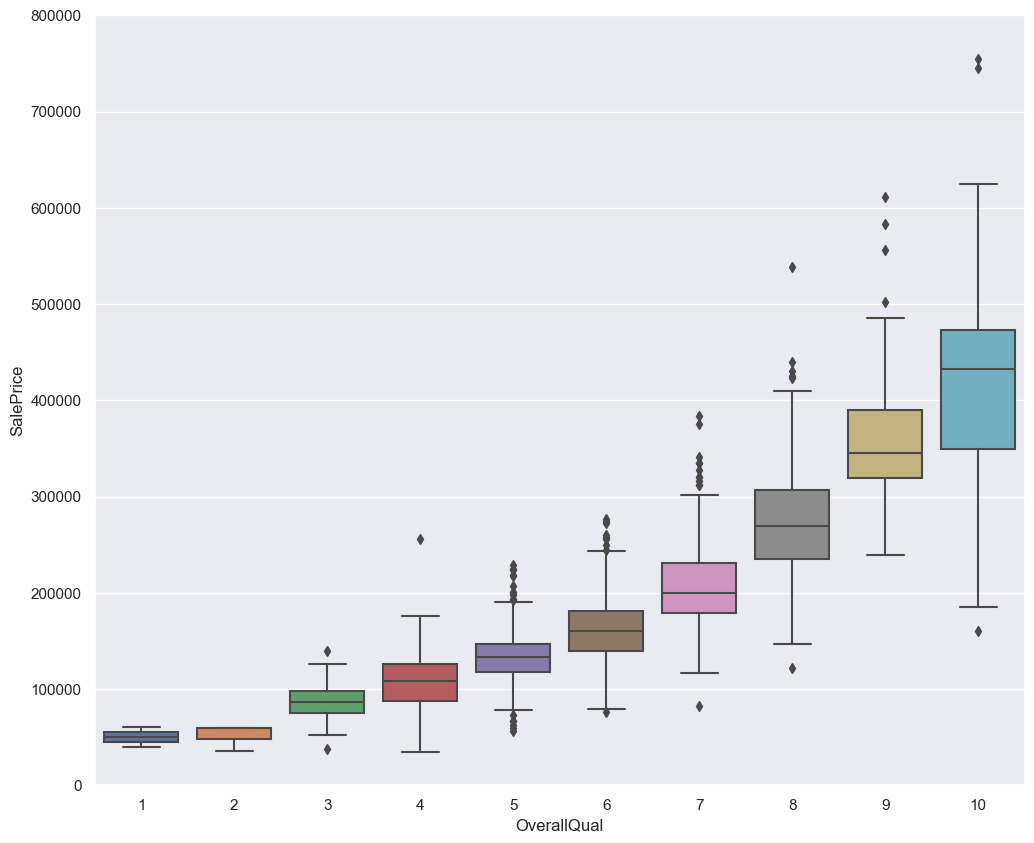

In [55]:
var = 'OverallQual'
data = pd.concat([train['SalePrice'], train[var]], axis=1)
f, ax = plt.subplots(figsize=(12, 10))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);

### Box Plot - Neighborhood

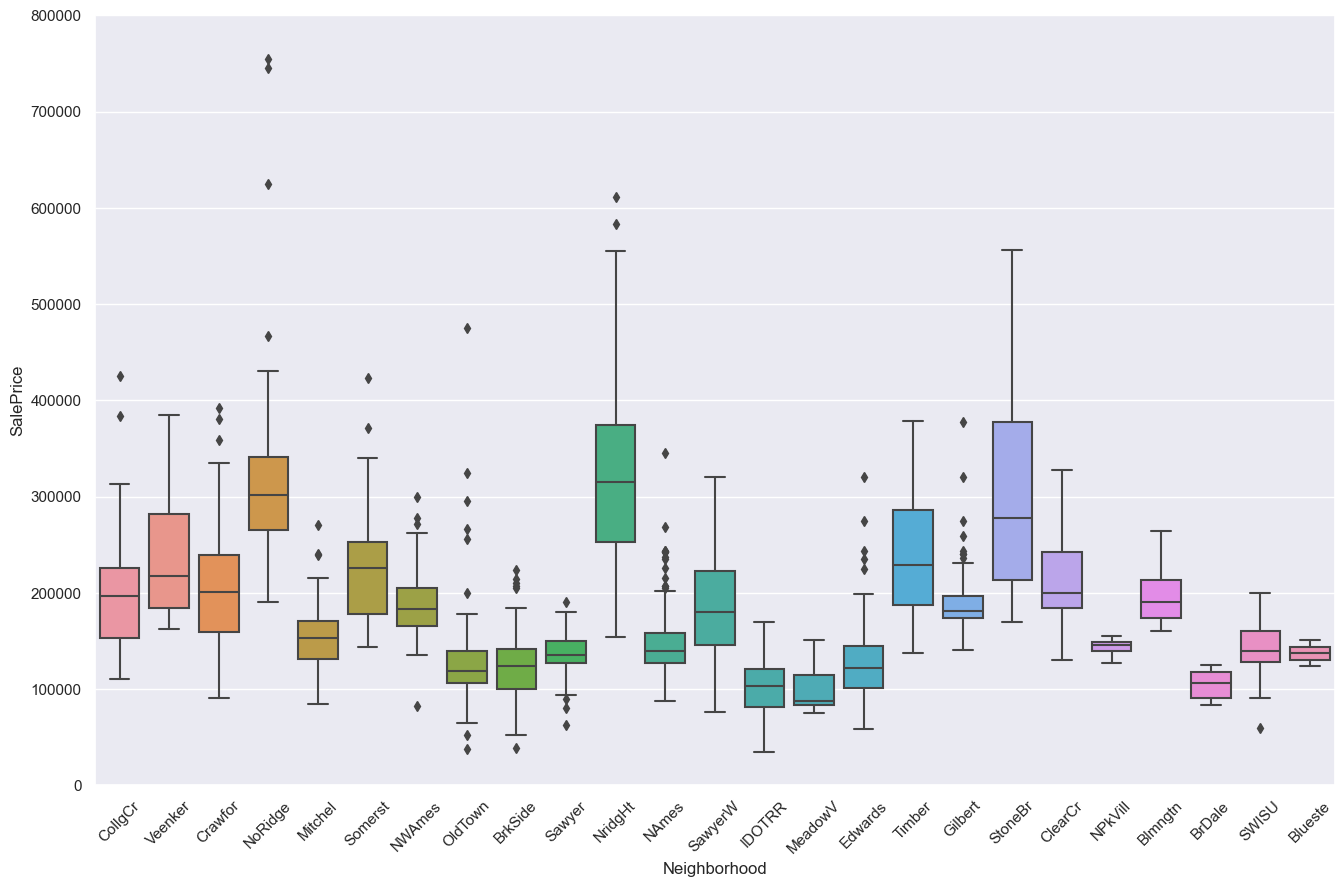

In [54]:
var = 'Neighborhood'
data = pd.concat([train['SalePrice'], train[var]], axis=1)
f, ax = plt.subplots(figsize=(16, 10))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);
xt = plt.xticks(rotation=45)

### Count Plot - Neighborhood

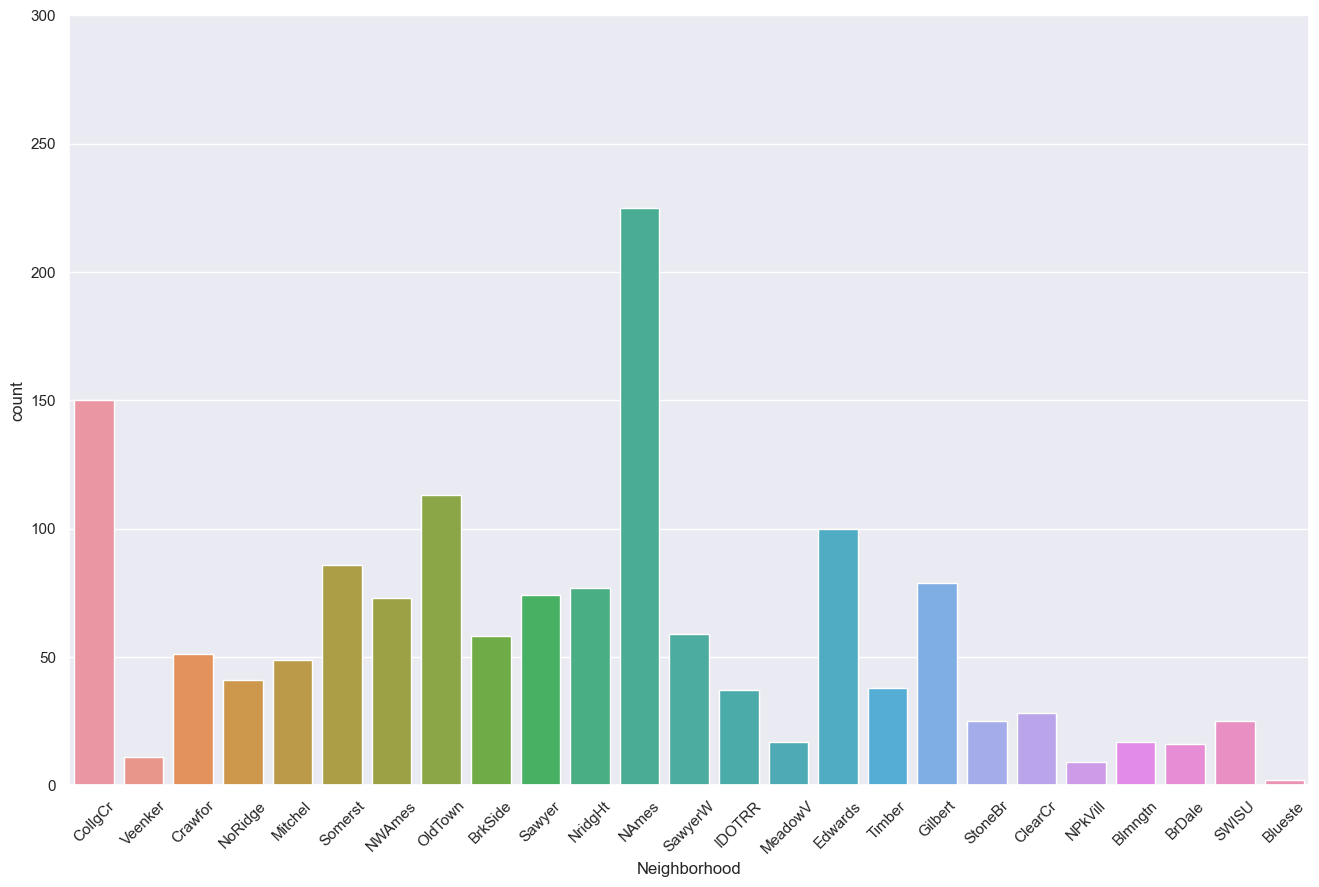

In [114]:
var = 'Neighborhood'
data = pd.concat([train['SalePrice'], train[var]], axis=1)
f, ax = plt.subplots(figsize=(16, 10))
fig = sns.countplot(x=var, data=data)
fig.axis(ymin=0, ymax=300);
xt = plt.xticks(rotation=45)

### ViolinPlot - functional vs SalePrice

<Axes: xlabel='Functional', ylabel='SalePrice'>

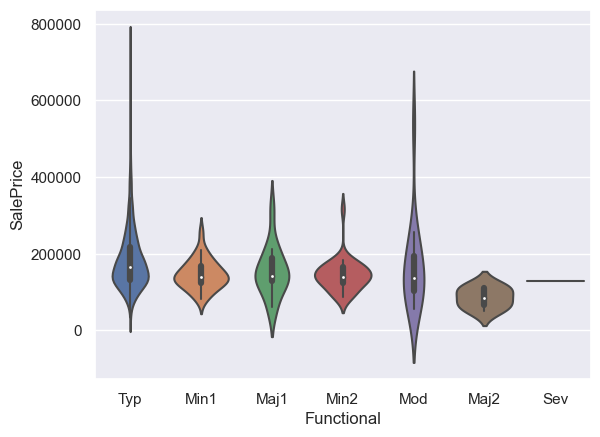

In [121]:
sns.violinplot(x='Functional', y='SalePrice', data=train)
#remember to assign a and y next time cuz seaborn does not recognise x and y itself

### FactorPlot - FirePlace vs SalePrice

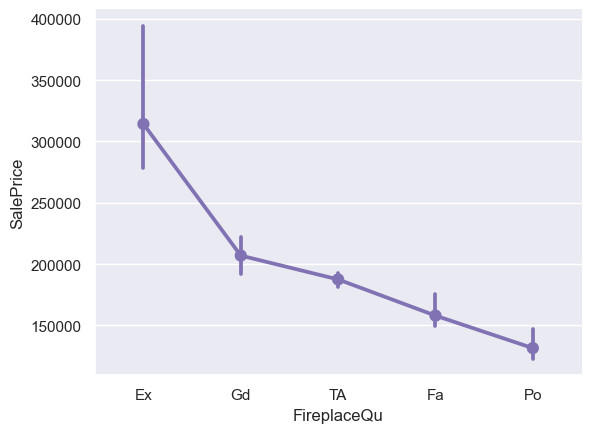

In [131]:
sns.catplot(x='FireplaceQu', y='SalePrice', data=train, kind='point', color='m',
            estimator=np.median, order=['Ex', 'Gd', 'TA', 'Fa', 'Po'],
            height=4.5, aspect=1.35)
#it was `factorplot` in the original file but the latest function 
#has been replaced with catplot
#parameter kind='point' creates a point plot

### Facet Grid Plot - FirePlace QC vs SalePrice

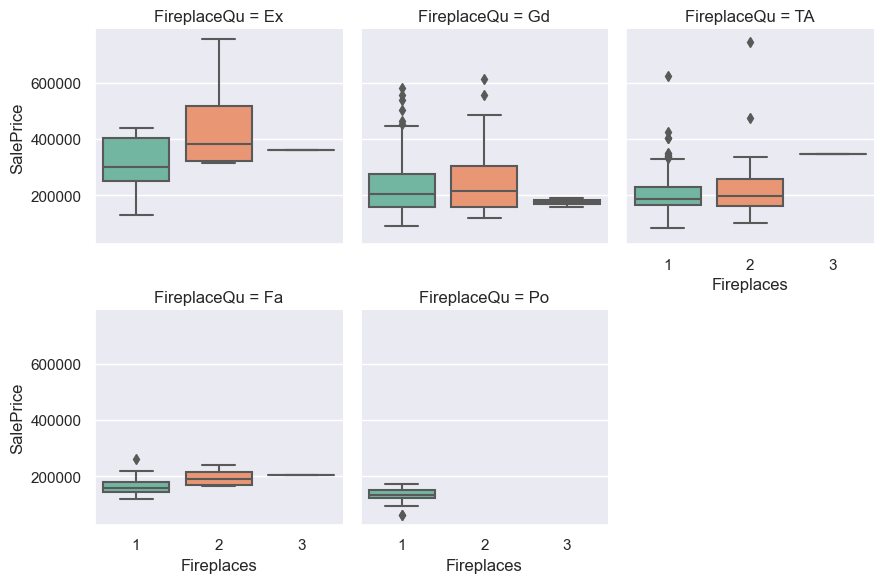

In [132]:
g = sns.FacetGrid(train, col = 'FireplaceQu', col_wrap = 3, col_order=['Ex', 'Gd', 'TA', 'Fa', 'Po'])
g.map(sns.boxplot, 'Fireplaces', 'SalePrice', order = [1, 2, 3], palette = 'Set2')

### PointPlot

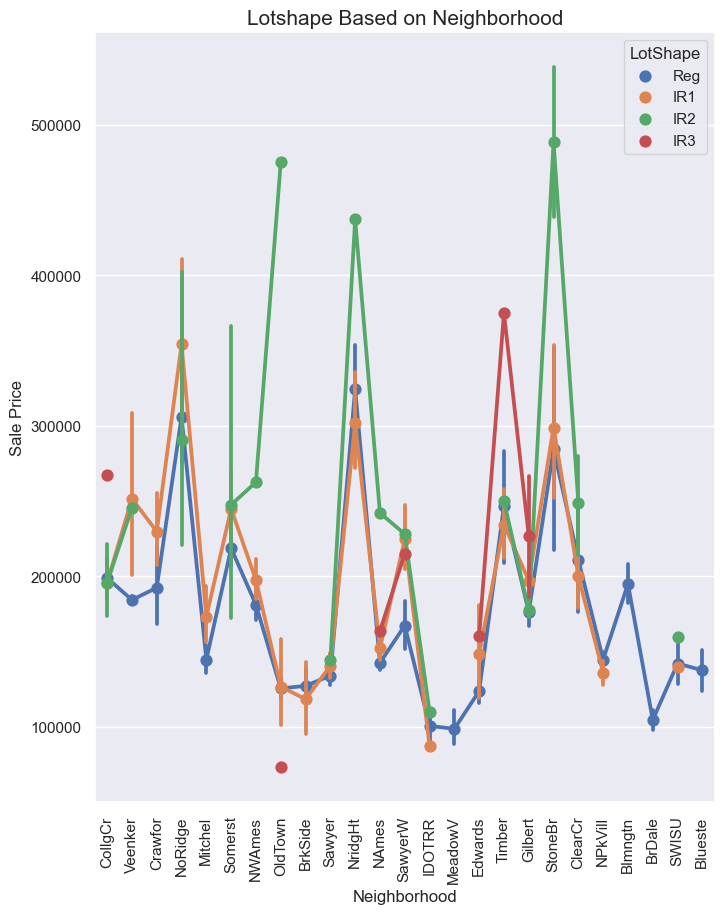

In [139]:
plt.figure(figsize=(8,10))
g1 = sns.pointplot(x='Neighborhood', y='SalePrice', 
                   data=train, hue='LotShape')
g1.set_xticklabels(g1.get_xticklabels(),rotation=90)
g1.set_title("Lotshape Based on Neighborhood", fontsize=15)
g1.set_xlabel("Neighborhood")
g1.set_ylabel("Sale Price", fontsize=12)
plt.show()

## Missing Value Analysis<br>
### Numeric Features

In [141]:
total = numeric_features.isnull().sum().sort_values(ascending=False)
percent = (numeric_features.isnull().sum()/numeric_features.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1,
                         join='outer', 
                         keys=['Total Missing Count', 
                               '% of Total Observations'])
missing_data.index.name =' Numeric Feature'

missing_data.head(20)

,Total Missing Count,% of Total Observations
Numeric Feature,,
LotFrontage,259,0.177397
GarageYrBlt,81,0.055479
MasVnrArea,8,0.005479
Id,0,0.000000
OpenPorchSF,0,0.000000
KitchenAbvGr,0,0.000000
TotRmsAbvGrd,0,0.000000
Fireplaces,0,0.000000
GarageCars,0,0.000000


### Missing values for al numeric features in Bar char Representation

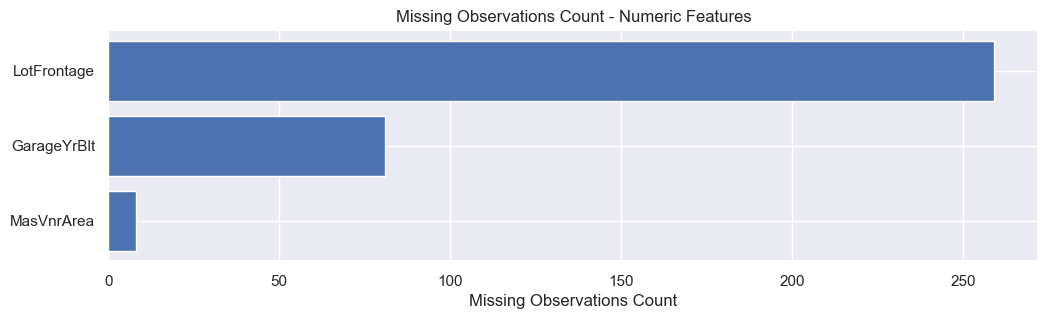

In [142]:
missing_values = numeric_features.isnull().sum(axis=0).reset_index()
missing_values.columns = ['column_name', 'missing_count']
missing_values = missing_values.loc[missing_values['missing_count']>0]
missing_values = missing_values.sort_values(by='missing_count')

ind = np.arange(missing_values.shape[0])
width = 0.1
fig, ax = plt.subplots(figsize=(12,3))
rects = ax.barh(ind, missing_values.missing_count.values, color='b')
ax.set_yticks(ind)
ax.set_yticklabels(missing_values.column_name.values, rotation='horizontal')
ax.set_xlabel("Missing Observations Count")
ax.set_title("Missing Observations Count - Numeric Features")
plt.show()

### Categorical Features

In [146]:
categorical_features = train.select_dtypes(include=[object])

total = categorical_features.isnull().sum().sort_values(ascending=False)
percent = (categorical_features.isnull().sum()/categorical_features.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1,join='outer', keys=['Total Missing Count', ' % of Total Observations'])
missing_data.index.name ='Feature'
missing_data.head(20)

,Total Missing Count,% of Total Observations
Feature,,
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
MasVnrType,872,0.597260
FireplaceQu,690,0.472603
GarageType,81,0.055479
GarageCond,81,0.055479
GarageQual,81,0.055479


### Missing values for Categorical features in Bar chart representation

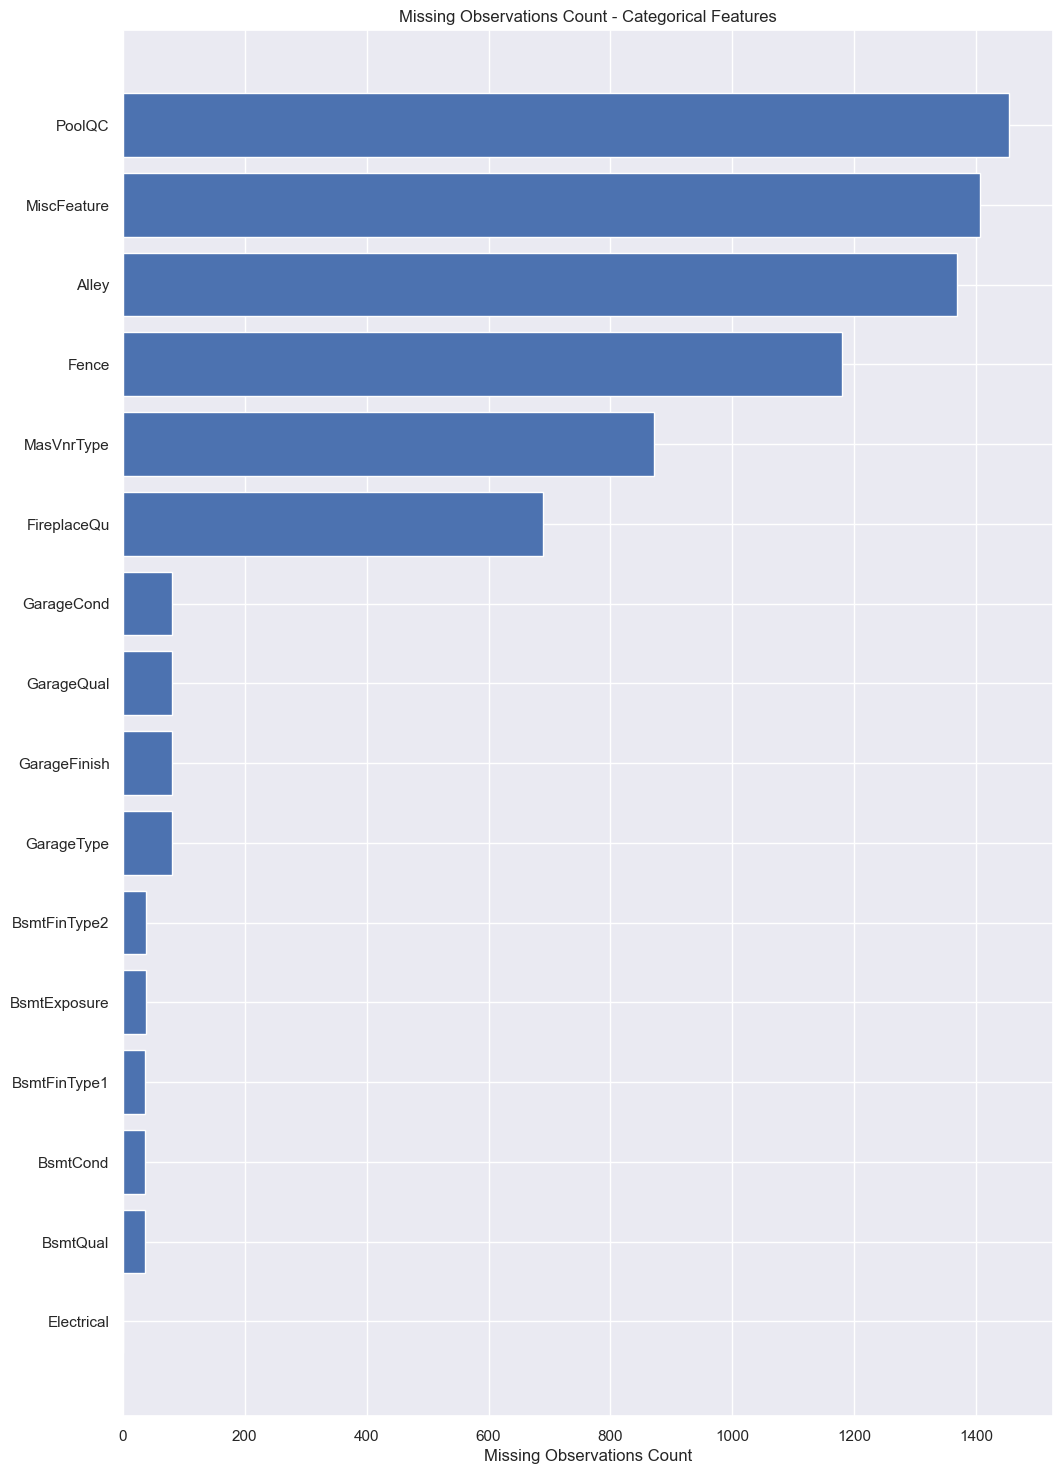

In [148]:
missing_values = categorical_features.isnull().sum(axis=0).reset_index()
missing_values.columns = ['column_name', 'missing_count']
missing_values = missing_values.loc[missing_values['missing_count']>0]
missing_values = missing_values.sort_values(by='missing_count')

ind = np.arange(missing_values.shape[0])
width = 0.9
fig, ax = plt.subplots(figsize=(12,18))
rects = ax.barh(ind, missing_values.missing_count.values)
ax.set_yticks(ind)
ax.set_yticklabels(missing_values.column_name.values, rotation='horizontal')
ax.set_xlabel("Missing Observations Count")
ax.set_title("Missing Observations Count - Categorical Features")
plt.show()

### Categorical Features Exploration

In [149]:
for column_name in train.columns:
    if train[column_name].dtypes == 'object':
        train[column_name] = train[column_name].fillna(train[column_name].mode().iloc[0])
        unique_category = len(train[column_name].unique())
        print("Feature '{column_name}' has '{unique_category}' unique categories".format(column_name = column_name,
                                                                                         unique_category=unique_category))
 
for column_name in test.columns:
    if test[column_name].dtypes == 'object':
        test[column_name] = test[column_name].fillna(test[column_name].mode().iloc[0])
        unique_category = len(test[column_name].unique())
        print("Features in test set '{column_name}' has '{unique_category}' unique categories".format(column_name = column_name, unique_category=unique_category))

Feature 'MSZoning' has '5' unique categories
Feature 'Street' has '2' unique categories
Feature 'Alley' has '2' unique categories
Feature 'LotShape' has '4' unique categories
Feature 'LandContour' has '4' unique categories
Feature 'Utilities' has '2' unique categories
Feature 'LotConfig' has '5' unique categories
Feature 'LandSlope' has '3' unique categories
Feature 'Neighborhood' has '25' unique categories
Feature 'Condition1' has '9' unique categories
Feature 'Condition2' has '8' unique categories
Feature 'BldgType' has '5' unique categories
Feature 'HouseStyle' has '8' unique categories
Feature 'RoofStyle' has '6' unique categories
Feature 'RoofMatl' has '8' unique categories
Feature 'Exterior1st' has '15' unique categories
Feature 'Exterior2nd' has '16' unique categories
Feature 'MasVnrType' has '3' unique categories
Feature 'ExterQual' has '4' unique categories
Feature 'ExterCond' has '5' unique categories
Feature 'Foundation' has '6' unique categories
Feature 'BsmtQual' has '4' u